In [1]:
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
import numpy as np
from numpy.fft import fft, rfft
from scipy import signal
from sklearn.decomposition import PCA

In [29]:
#% run outils.py # les fonctions perso et les imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

### Import CSV

In [3]:
data = pd.read_csv('AB_SurE_Entête.csv', sep = ';')

In [4]:
data.head(5)

,date,Respiration,GSR,Temperature,CFM
0,06/03/2014 15:19:29.756,-10.644,-44.157,29.417,74
1,06/03/2014 15:19:29.787,-10.379,-44.157,29.417,74
2,06/03/2014 15:19:29.819,-10.168,-44.157,29.417,74
3,06/03/2014 15:19:29.850,-9.981,-44.157,29.417,74
4,06/03/2014 15:19:29.881,-9.833,-44.169,29.417,74


In [5]:
data['Respiration'].head()

0   -10.644
1   -10.379
2   -10.168
3    -9.981
4    -9.833
Name: Respiration, dtype: float64

### Conversion des dates

In [6]:
dates = []
for date in data['date']:
    dates.append(datetime.strptime(date, '%d/%m/%Y %H:%M:%S.%f'))

In [7]:
type(data['Respiration'][3])

numpy.float64

### Réindexation avec les dates

In [8]:
data['Respiration'].index=dates
respi = data['Respiration']

In [9]:
respi.head(10)

2014-03-06 15:19:29.756   -10.644
2014-03-06 15:19:29.787   -10.379
2014-03-06 15:19:29.819   -10.168
2014-03-06 15:19:29.850    -9.981
2014-03-06 15:19:29.881    -9.833
2014-03-06 15:19:29.912    -9.692
2014-03-06 15:19:29.944    -9.575
2014-03-06 15:19:29.975    -9.482
2014-03-06 15:19:30.006    -9.427
2014-03-06 15:19:30.037    -9.435
Name: Respiration, dtype: float64

### Plot

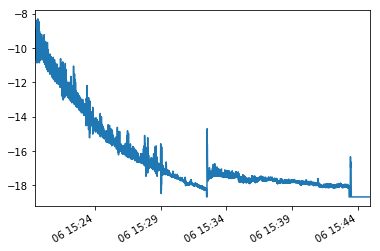

In [10]:
respi.plot()

### Spectrogramme

In [11]:
def affiche_spectrogramme(freq, time, Sxx, title, nom_fichier):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.pcolormesh(time, freq, Sxx, cmap='RdBu', vmax = 2)
    ax.set_ylabel('Fréquence [Hz]')
    ax.set_xlabel('Temps [sec]')
    ax.set_ylim(0, 1) # fréquence normale chez l'adulte : entre 0.2 et 0.3 Hz
    cbar = fig.colorbar(cax)
    ax.set_title(title)
    fig.savefig('./Images/Spectrogrammes/' + nom_fichier)

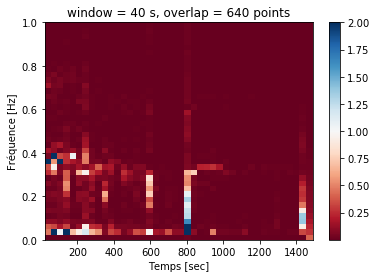

In [12]:
Y = respi
dt = 40 # calcul de la FFT sur dt secondes
fs = 32 # frequence d'échantillonage = 32Hz
nperseg = fs*dt# nombre de sample par calcul de FFT
overlap = nperseg//2 # recouvrement entre les fenêtres de cacul de FFT
freq, time, Sxx = signal.spectrogram(Y, fs=fs, nperseg=nperseg, return_onesided=True)
title = 'window = ' + str(dt) + ' s, ' + 'overlap = ' + str(overlap) + ' points'
nom_fichier = title
affiche_spectrogramme(freq, time, Sxx, title, nom_fichier)

### FFT

In [13]:
def affiche_fft(t, y, Y):
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(t, y)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')

    ax[1].plot(freq[:n//2], abs(Y[:n//2]), 'r') # plotting the spectrum
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|')

In [14]:
n = len(Y) # nb d'échantillons
tmin, tmax = dates[0], dates[-1]
delta = (tmax - tmin).total_seconds()
print(delta)
k = np.arange(0, n, 1) #arange(min, max, pas)
freq = k/delta # les fréquences

1525.063


In [15]:
t = []
for date in dates:
    t.append((date-dates[0]).total_seconds())
time = Series(t, name='t')

In [16]:
time.head(10)

0    0.000
1    0.031
2    0.063
3    0.094
4    0.125
5    0.156
6    0.188
7    0.219
8    0.250
9    0.281
Name: t, dtype: float64

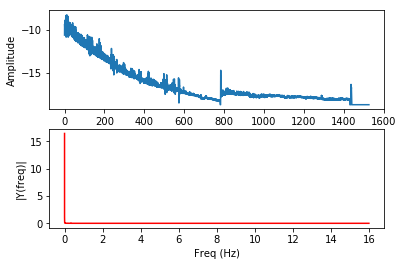

In [17]:
tfY = fft(Y)/n # fft computing and normalization    
# Affichage
affiche_fft(t, Y, tfY)

### ACP

In [38]:
def proj_ACP(X):
    """
    Affiche les données dans le premier plan factoriel.
    X est la matrice d'entrée (var centrées réduites), y est le vecteur des classes de sortie.
    """
    # ACP 
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X[['Respiration', 'GSR', 'Temperature', 'CFM']]) # X est un tableau numpy
    
    # Affichage
    fig = plt.figure(figsize = (30, 20))
    ax = fig.add_subplot(111, axisbg = 'white')
    nb_points = len(X)
    points = DataFrame(X_pca, columns = ['x', 'y'], index = X.index)
    print(points.head(20))
    ax.scatter(points.x, points.y, s = 40, marker = 'o', alpha = 0.4, c = X['t'])

/Users/Hal/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


           x         y
0   2.208687 -0.370615
1   2.277648 -0.117751
2   2.332557  0.083586
3   2.381221  0.262022
4   2.419114  0.401579
5   2.455807  0.536122
6   2.486254  0.647763
7   2.510456  0.736504
8   2.524769  0.788986
9   2.522687  0.781352
10  2.533077  0.818560
11  2.540903  0.848146
12  2.540903  0.848146
13  2.538821  0.840513
14  2.522687  0.781352
15  2.528672  0.803299
16  2.520605  0.773718
17  2.522687  0.781352
18  2.520846  0.773712
19  2.514620  0.751772


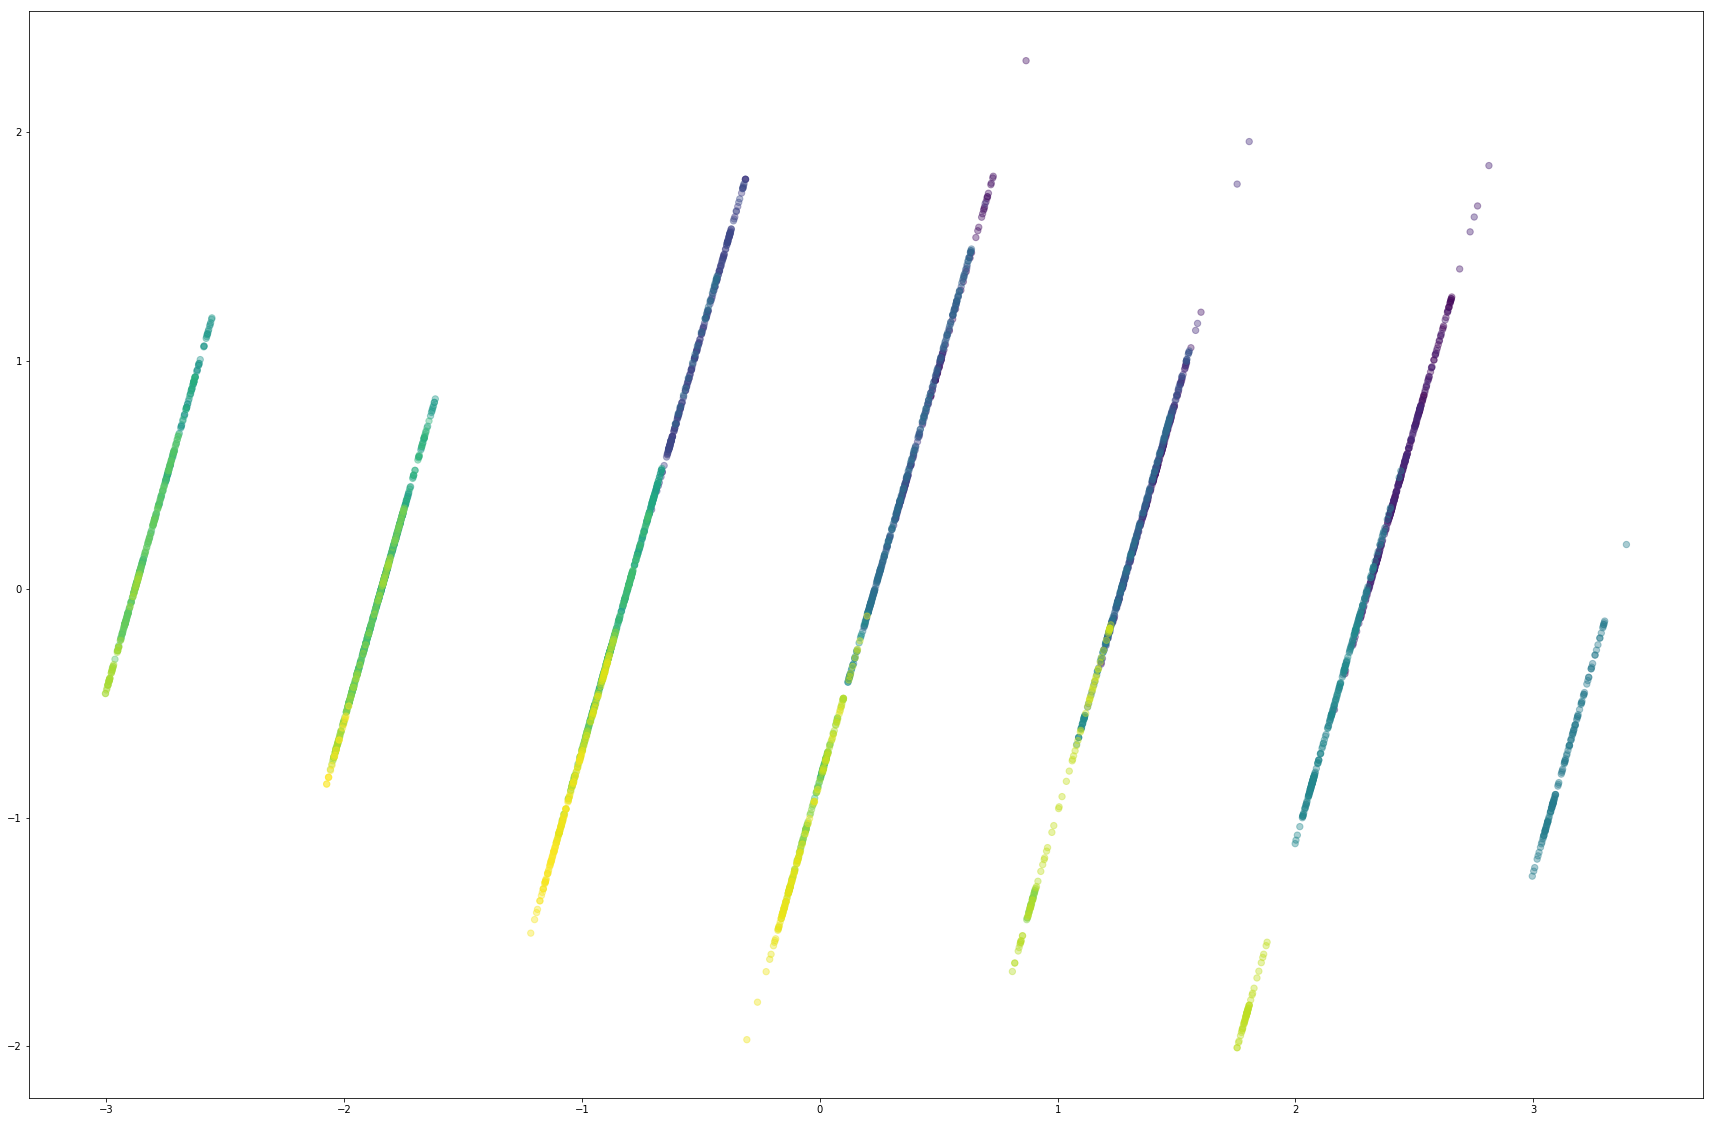

In [39]:
X = DataFrame(data[['Respiration', 'GSR', 'Temperature', 'CFM']], columns = ['t', 'Respiration', 'GSR', 'Temperature', 'CFM'])
X['t'] = time
#X.head(10)
proj_ACP(X.head(4000))